### K-Means Clustering 

K-means works in any dimension, but is most fun to demonstrate in two, because we can plot pictures.

Lets make some (fake) data with clusters. We do this by shifting the means of the points around. 

In [4]:
?rnorm

. x == 200 values (n=200), 2 columns, 100 rows

. xmean == 4 rows, 2 columns, with n = 8, sd=4 (4 clusters)

In [73]:
#random normal matrices

set.seed(101)

#rnorm(n, mean = 0, sd = 1)
x<-matrix(rnorm(100*2), 100, 2)

#4 clusters; high sd means shift mean around
#each with 2 means
#4 rows, 2 columns
xmean<-matrix(rnorm(8, sd=4), 4, 2)

In [28]:
head(x)

3.0620536,-0.54152249
-10.5137387,6.56392584
-6.9988551,4.51046691
3.6024496,0.36316034
3.6988593,-0.06282734
-0.1382925,9.44889010


In [93]:
#tail(x)

In [34]:
#length(x)

In [95]:
#sd == 3

# mean(x)
# sd(x)

In [88]:
xmean

-0.6561294,4.8396994
-5.5331003,3.5780671
1.6940451,-0.4047942
-3.1619556,1.1884903


Decide which rows get which means (cluster). 

So I'm going to pick a random sample from the
numbers 1 to 4.
I want 100 of them because I've got 100 rows.
And replace equals true.
So which is going to say which observation
belongs to which cluster.

In [16]:
#sample takes a sample of the specified size from the elements of x using either with or without replacement.
#?sample

In [89]:
which<- sample(1:4, 100, replace=TRUE)

In [21]:
#1 through 4 randomly, 100 times, with replacement
#which

So now I'll simply add the appropriate mean to the
appropriate rows.
So this is a kind of typical r vector operation that's nice
and tricky, and effective.

So xmean is a 4-row matrix, but I'm
indexing it with 100 indices.
So that will produce 100-row matrix with 2 columns.
So it'll pick out the right mean for each row, and I'll
just add it to the original x.



In [90]:
#add indexed row values from xmean to x values
x<- x+xmean[which,]
head(x)

-5.8591367,3.846133
-2.6094938,0.596282
-1.3310733,6.973186
-5.3187408,4.750816
-2.8511864,1.935251
0.5178369,4.609191


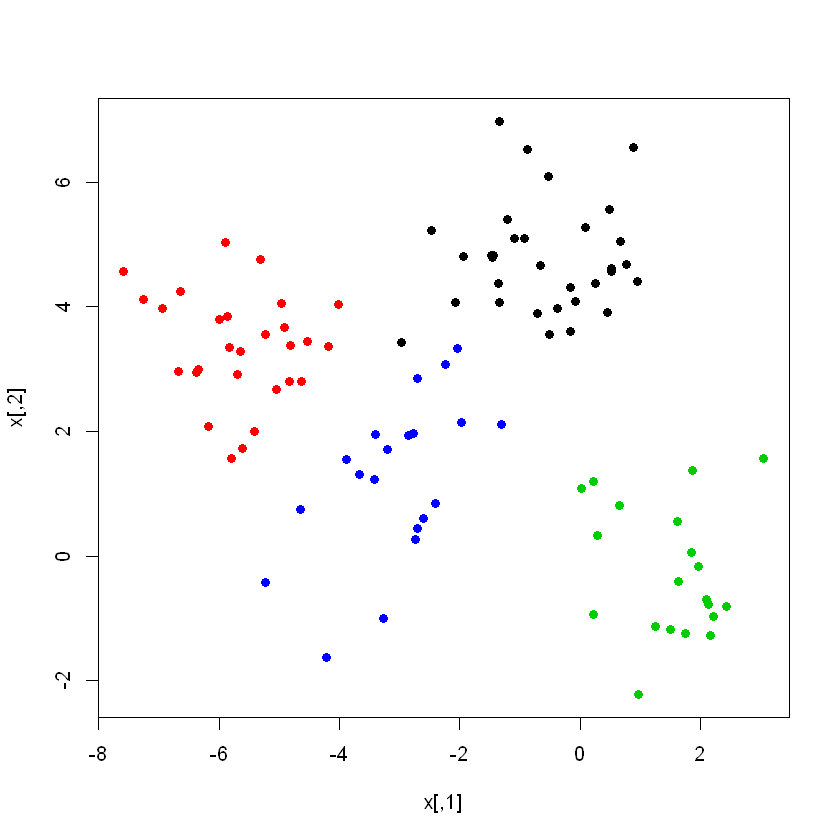

In [91]:
#which is used for coler, 1 through 4
plot(x,col=which,pch=19)

We know the "true" cluster IDs, but we wont tell that to the 'kmeans' algorithm.

And we use the K-means algorithm.
We're going to tell it there are 4 clusters here.

We call K-means, and we tell it 4 clusters.
And we tell it to do 15 random starts.
Random starts are cheap.
If you remember, K-means clustering starts with a
random start for where the clusters are.
And of course, if you pick a bad random start, it might
find you a bad solution.
Unlikely, in this case, but that's what we do anyway.

1. It prints out the cluster means.
There's going to be 4 of them, because there are 4 clusters.

2. The cluster vector, that's the assignment of each point to
the clusters that it found.

3. And then there's some summaries of the cluster.
So within clusters, sum of squares, by cluster.
There are 4 clusters, so that's the sum of squares
within each cluster.
That sum of squares deviations of each point around its
cluster mean.

4. And then, and this is perhaps more interesting, the between
sum of squares to the total sum of squares.
So in a sense, this Is like the r-squared for clustering.
It's a percent of variance explained
by the cluster means.
And that's pretty high, so it suggests it's done a good job.
And then it tells us what the other components on the
cluster object are.

In [96]:
#put  in x values (which is now seperated by x means)
km.out<-kmeans(x,4,nstart=15)
km.out

K-means clustering with 4 clusters of sizes 32, 28, 20, 20

Cluster means:
        [,1]       [,2]
1 -0.5787702  4.7639233
2 -5.6518323  3.3513316
3  1.4989983 -0.2412154
4 -3.1104142  1.2535711

Clustering vector:
  [1] 2 4 1 2 4 1 2 4 1 1 3 1 1 3 4 3 2 3 2 2 2 2 2 3 1 1 4 2 4 1 2 3 2 4 4 3 3
 [38] 4 3 3 2 4 4 2 2 3 2 1 2 4 2 1 1 3 3 4 3 1 1 1 4 2 2 2 4 4 1 1 3 2 2 1 1 3
 [75] 1 3 2 1 1 1 4 1 4 1 2 3 1 2 2 1 1 4 2 4 1 1 3 3 1 1

Within cluster sum of squares by cluster:
[1] 53.04203 42.40322 34.95921 48.52107
 (between_SS / total_SS =  85.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

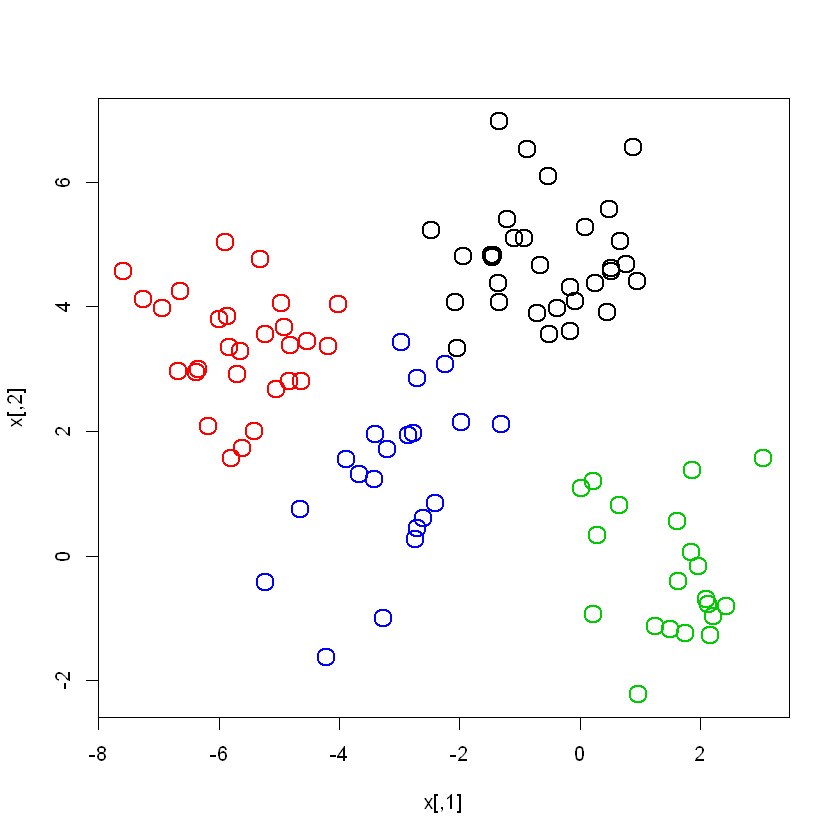

In [97]:
plot(x, col=km.out$cluster, cex=2,pch=1,lwd=2)

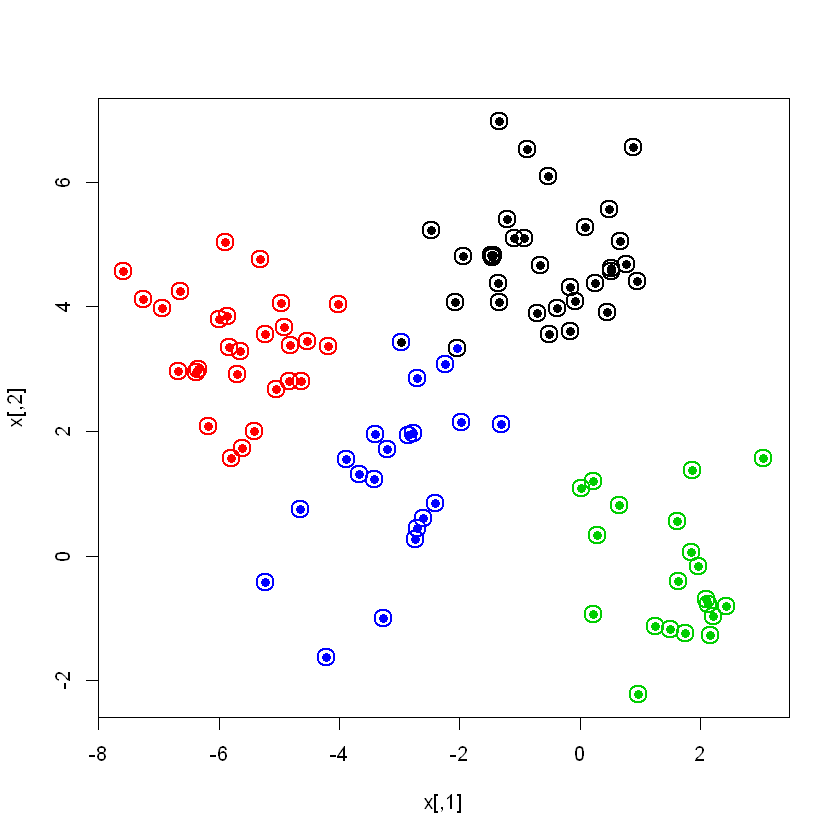

In [98]:
#should be a mismatch in color but not the case
#ordering of numbers should be differnet between kemans and which
plot(x, col=km.out$cluster, cex=2,pch=1,lwd=2)
points(x,col=which,pch=19)

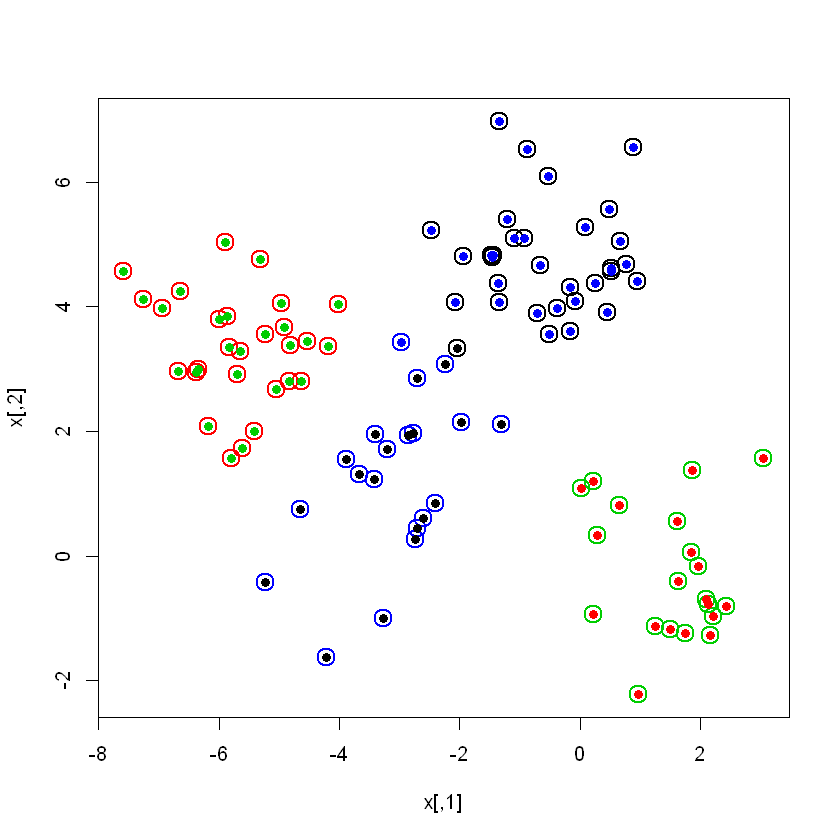

In [101]:
#now it is a mismatch 
plot(x, col=km.out$cluster, cex=2,pch=1,lwd=2)
points(x,col=which,pch=19)
#reassign colors
points(x,col=c(4,3,2,1)[which],pch=19)